In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wifi_filename = "wifi_data.csv"
wifi_data = pd.read_csv(wifi_filename)
wifi_data.columns.values

array(['version', 'buiildingId', 'x', 'y', 'floor', 'SSID', 'level',
       'timestamp', 'frequency', 'BSSID', 'capabilities', 'uploadedAt'],
      dtype=object)

In [3]:
min_ap_occurances_threhsold = 50

In [21]:
global_x_min = wifi_data['x'].min()
global_x_max = wifi_data['x'].max()
global_y_min = wifi_data['y'].min()
global_y_max = wifi_data['y'].max()

In [4]:
def remove_ap_by_occurances(data,threshold):
    ssid_counts = data['SSID'].value_counts()
    common_ssids = ssid_counts[ssid_counts >= threshold].index
    filtered_wifi_data = data[data['SSID'].isin(common_ssids)]
    return filtered_wifi_data

def get_ssid_map_area(data,ssid):
    filtered_data = data[data['SSID'] == ssid]
    x_min = filtered_data['x'].min()
    x_max = filtered_data['x'].max()
    y_min = filtered_data['y'].min()
    y_max = filtered_data['y'].max()
    return (
        x_min,
        x_max,
        y_min,
        y_max,
    )

def plot(data,ssid):
    pass
    

In [5]:
data = remove_ap_by_occurances(wifi_data,min_ap_occurances_threhsold)
data['SSID'].value_counts()

SSID
(hidden SSID)               2362
Afeka-Staff                 2311
Afeka-Wifi-Open             2027
Afeka-Students              1510
CLEAN-AIR                    157
Yonatan                      107
DIRECT-D3AF3784               97
SAY                           77
c66dd42d                      69
Naama                         68
c66f9421                      59
c66f9b46                      52
DIRECT-1CJ4tEB1C3117GOg4      52
Name: count, dtype: int64

In [16]:
bin_size = 5 
x_bins = 100
y_bins = 100

In [17]:
def plot_heatmap_for_ssid(data, ssid):
    # Filter data for the specified SSID
    ssid_data = data[data['SSID'] == ssid]
    
    # Define heatmap parameters


    # Plot the heatmap
    plt.figure(figsize=(4, 3))
    heatmap, xedges, yedges = np.histogram2d(ssid_data['x'], ssid_data['y'], bins=(x_bins, y_bins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    # Plot heatmap
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Density')
    
    # Add annotations for point counts
    for i in range(len(xedges) - 1):
        for j in range(len(yedges) - 1):
            plt.text(xedges[i] + bin_size / 2, yedges[j] + bin_size / 2, int(heatmap[i, j]),
                     ha='center', va='center', color='white')
    
    plt.title(f'Heatmap for SSID: {ssid}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

In [14]:
data['SSID'].value_counts()

SSID
(hidden SSID)               2362
Afeka-Staff                 2311
Afeka-Wifi-Open             2027
Afeka-Students              1510
CLEAN-AIR                    157
Yonatan                      107
DIRECT-D3AF3784               97
SAY                           77
c66dd42d                      69
Naama                         68
c66f9421                      59
c66f9b46                      52
DIRECT-1CJ4tEB1C3117GOg4      52
Name: count, dtype: int64

In [41]:
# def get_max_range_per_area(area_percentage=5):

#     data['SSID'].value_counts().max()

2362

In [44]:
bins = 50
vmax = 25
vmin = 0
figsize = (4,3)

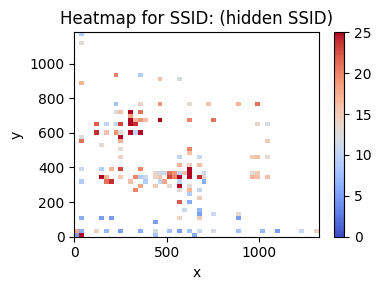

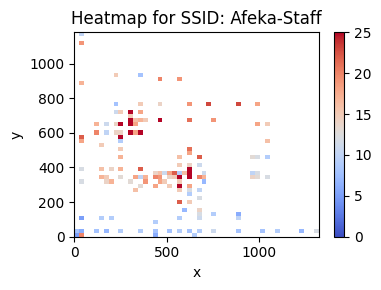

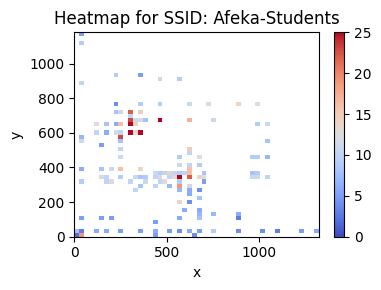

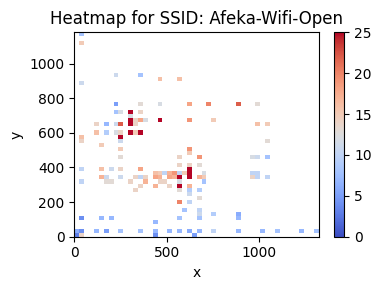

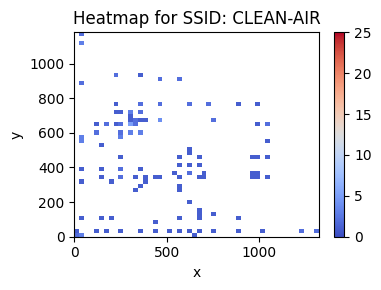

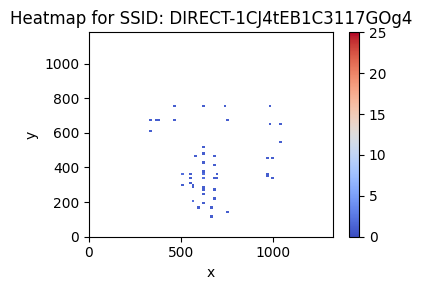

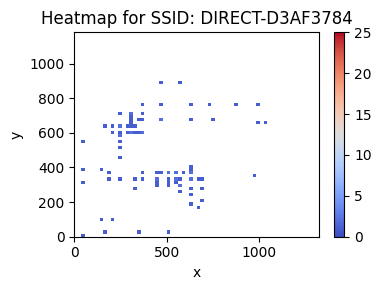

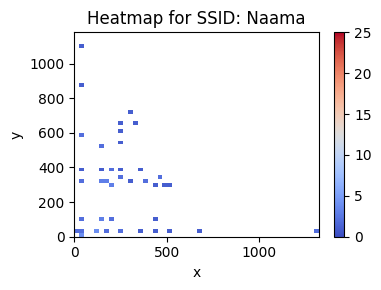

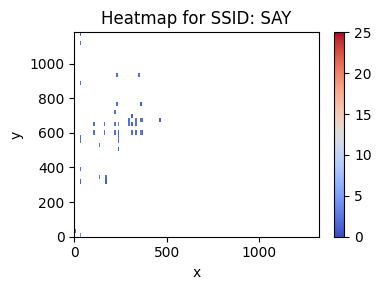

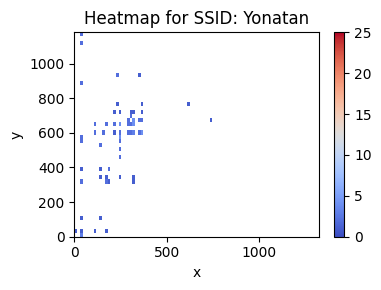

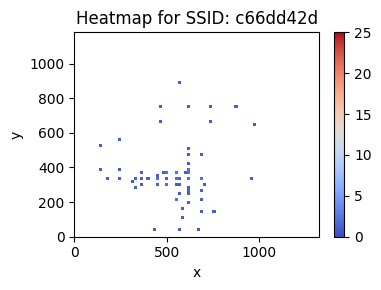

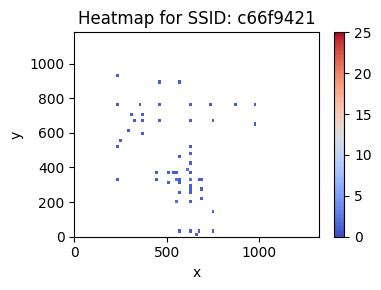

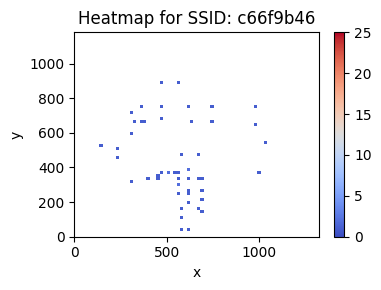

In [45]:
grouped_data = data.groupby('SSID')
for ssid, group in grouped_data:
    plt.figure(figsize=figsize)
    sns.histplot(data=group, x='x', y='y', bins=bins, cmap='coolwarm', cbar=True,
                 vmin=vmin, vmax=vmax)
    plt.title(f'Heatmap for SSID: {ssid}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(global_x_min, global_x_max)
    plt.ylim(global_y_min, global_y_max)
    plt.tight_layout()
    plt.show() 

SSID
(hidden SSID)           2362
Afeka-Staff             2311
Afeka-Wifi-Open         2027
Afeka-Students          1510
CLEAN-AIR                157
                        ... 
DDPAI_N3Pro_09C2           1
T2-cc8cdaa88ee6            1
smartBox-DB8C              1
SAMSONIX-R910 410c10       1
My VW 0274                 1
Name: count, Length: 93, dtype: int64